In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# Windows 용 한글 폰트 오류 해결
from matplotlib import font_manager,rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)

In [130]:
df = pd.read_excel('1-9호선 통합본(중복 제거).xlsx')

In [132]:
df

,Unnamed: 0,역명,노선명,mean,max,min,노선개수,대합실면적,승강장면적,지하상가 개수,역내편의점 개수,화장실개수,에스컬레이터 대수,엘리베이터 대수,자전거보관소 대수,물품보관함 개수,소화기 대수,스마트도서관 개수
0,0,동대문,1호선,23812,35181,16032,2,3400.0,2090.0,1.0,0,1.0,1.0,1.0,30,25.0,47,0
1,1,동묘앞,1호선,21015,37417,12384,2,5700.0,4194.0,1.0,0,4.0,12.0,12.0,6,9.0,43,0
2,2,서울역,1호선,105211,139845,65919,2,8725.0,2080.0,1.0,0,1.0,5.0,5.0,10,64.0,NaN,0
3,3,시청,1호선,49914,74556,17937,2,6863.0,3784.0,6.0,0,1.0,3.0,3.0,25,44.0,68,1
4,4,신설동,1호선,26842,37009,9983,2,4164.0,3076.0,NaN,0,1.0,NaN,NaN,66,9.0,46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,308,종합운동장,9호선,9845,15620,2730,2,NaN,NaN,2.0,1,2.0,18.0,6.0,20,NaN,35,0
309,309,중앙보훈병원,9호선,20851,29135,5508,1,NaN,NaN,1.0,1,1.0,10.0,5.0,210,9.0,-,1
310,310,증미,9호선,14372,20485,3537,1,NaN,NaN,NaN,1,1.0,18.0,3.0,30,NaN,66,0
311,311,한성백제,9호선,5735,14163,1628,1,NaN,NaN,NaN,1,1.0,10.0,3.0,200,9.0,-,0


In [114]:
df_grouped = df.groupby('노선명', as_index=False).agg({
    'mean': 'sum',    # 노선별 평균 이용객 수 합산
    '지하상가 개수': 'sum'   # 노선별 지하상가 개수 합산
})

In [116]:
df_grouped

,노선명,mean,지하상가 개수
0,1호선,471094,21.0
1,2호선,2719416,232.0
2,3호선,1027259,155.0
3,4호선,1027596,116.0
4,5호선,1263855,217.0
5,6호선,659735,105.0
6,7호선,1124695,253.0
7,8호선,374087,42.0
8,9호선,764320,6.0


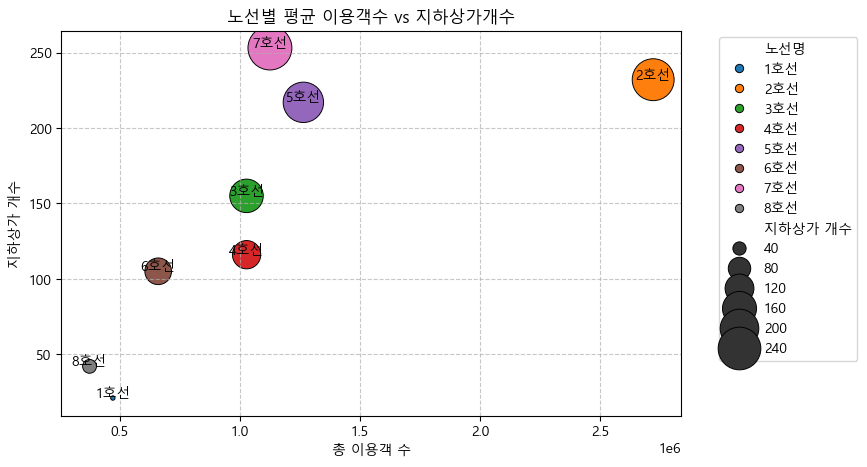

In [153]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="mean", y="지하상가 개수", size = "지하상가 개수", hue = "노선명", data = df_grouped, sizes=(10,1000), edgecolor ="black")

for i in range(len(df_grouped)):
    plt.text(df_grouped['mean'][i], df_grouped['지하상가 개수'][i] + 0.5, df_grouped['노선명'][i], ha='center')

plt.xlabel("총 이용객 수")
plt.ylabel("지하상가 개수")
plt.title("노선별 평균 이용객수 vs 지하상가개수")
plt.legend(bbox_to_anchor=(1.05, 1), loc = "upper left")

plt.grid(True,linestyle="--", alpha=0.7)
plt.show()

- 대체로 이용객수가 많을수록 지하상가 개수도 많은 편임(2호선, 7호선 등)
- 7호선, 5호선이 위쪽에 위치하는 것으로 보아 지하상가 개수가 많음을 알 수 있음
   
-> 고속터미널역을 포함한 강남, 여의도 등 주요 상업 지역을 지나가기 때문으로 예상
- 반면 1호선, 9호선, 8호선은 지하상가 개수가 적음
  
  -> 서울교통공사에서 취급하는 1호선이 서울~청량리 구간이기 때문에 상대적으로 작을 수밖에 없음
  
  -> 8호선은 분당-잠실과 같이 특정 지역 중심이라 상업 밀집도가 낮은 것으로 보임

  -> 9호선의 지하상가는 제대로 집계되지 않음

## 9호선은 제외하고 다시 그래프 그리기

In [144]:
df[df["노선명"] == "3호선"]

,Unnamed: 0,역명,노선명,mean,max,min,노선개수,대합실면적,승강장면적,지하상가 개수,역내편의점 개수,화장실개수,에스컬레이터 대수,엘리베이터 대수,자전거보관소 대수,물품보관함 개수,소화기 대수,스마트도서관 개수
60,60,가락시장,3호선,17201,23088,4419,2,12557.0,3508.0,1.0,0,2.0,22.0,22.0,261,13.0,46,0
61,61,경복궁,3호선,50387,83810,23347,1,8561.0,2653.0,1.0,0,1.0,10.0,10.0,52,76.0,54,1
62,62,경찰병원,3호선,13967,19117,3614,1,6914.0,2886.0,2.0,0,2.0,20.0,20.0,95,9.0,64,0
63,63,고속터미널,3호선,98210,141921,49510,3,11984.0,3799.0,39.0,0,NaN,24.0,24.0,0,72.0,67,0
64,64,교대,3호선,24701,34664,3545,2,6980.0,2560.0,7.0,1,1.0,2.0,2.0,34,13.0,39,0
65,65,구파발,3호선,41636,56645,17624,1,3299.0,1858.0,NaN,0,1.0,4.0,4.0,700,13.0,46,1
66,66,금호,3호선,14957,19440,6254,1,3284.0,1816.0,4.0,1,1.0,6.0,6.0,44,9.0,35,1
67,67,남부터미널,3호선,57828,80202,21069,1,6131.0,1778.0,NaN,0,1.0,2.0,2.0,51,21.0,36,0
68,68,녹번,3호선,27944,37849,10372,1,3249.0,1628.0,5.0,0,1.0,2.0,2.0,74,9.0,32,1
69,69,대청,3호선,19753,28103,5638,1,5977.0,2623.0,1.0,0,1.0,4.0,4.0,166,9.0,36,0


In [136]:
df.drop(df.index[275:], axis=0, inplace=True)
df

,Unnamed: 0,역명,노선명,mean,max,min,노선개수,대합실면적,승강장면적,지하상가 개수,역내편의점 개수,화장실개수,에스컬레이터 대수,엘리베이터 대수,자전거보관소 대수,물품보관함 개수,소화기 대수,스마트도서관 개수
0,0,동대문,1호선,23812,35181,16032,2,3400.0,2090.0,1.0,0,1.0,1.0,1.0,30,25.0,47,0
1,1,동묘앞,1호선,21015,37417,12384,2,5700.0,4194.0,1.0,0,4.0,12.0,12.0,6,9.0,43,0
2,2,서울역,1호선,105211,139845,65919,2,8725.0,2080.0,1.0,0,1.0,5.0,5.0,10,64.0,NaN,0
3,3,시청,1호선,49914,74556,17937,2,6863.0,3784.0,6.0,0,1.0,3.0,3.0,25,44.0,68,1
4,4,신설동,1호선,26842,37009,9983,2,4164.0,3076.0,NaN,0,1.0,NaN,NaN,66,9.0,46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,270,신흥,8호선,10245,14036,4187,1,3196.0,1665.0,NaN,1,1.0,NaN,NaN,55,9.0,27,0
271,271,암사역사공원,8호선,26239,42050,3944,1,4402.0,3262.0,NaN,0,NaN,12.0,12.0,0,NaN,NaN,0
272,272,잠실,8호선,37236,60933,17002,2,13040.0,2654.0,25.0,1,1.0,5.0,5.0,250,17.0,82,0
273,273,장지,8호선,31598,41194,8300,1,4099.0,1628.0,2.0,1,1.0,8.0,8.0,147,13.0,26,2


In [138]:
df_grouped = df.groupby('노선명', as_index=False).agg({
    'mean': 'sum',    # 노선별 평균 이용객 수 합산
    '지하상가 개수': 'sum'   # 노선별 지하상가 개수 합산
})

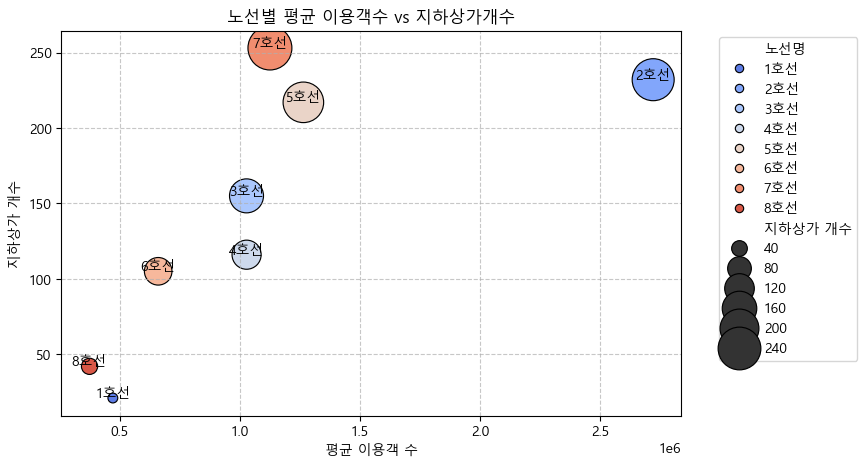

In [155]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="mean", y="지하상가 개수", size = "지하상가 개수", hue = "노선명", data = df_grouped, sizes=(50,1000), palette = "coolwarm", edgecolor ="black")

for i in range(len(df_grouped)):
    plt.text(df_grouped['mean'][i], df_grouped['지하상가 개수'][i] + 0.5, df_grouped['노선명'][i], ha='center')

plt.xlabel("평균 이용객 수")
plt.ylabel("지하상가 개수")
plt.title("노선별 평균 이용객수 vs 지하상가개수")
plt.legend(bbox_to_anchor=(1.05, 1), loc = "upper left")

plt.grid(True,linestyle="--", alpha=0.7)
plt.savefig("./market_count.png")
plt.show()

- 이용객수는 2호선이 압도적으로 많음
- 대체로 이용객수가 많을수록 지하상가 개수도 많은 편임(2호선, 7호선 등)
- 7호선이 맨 위쪽에 위치하는 것으로 보아 지하상가 개수가 많음을 알 수 있음
   
-> 고속터미널역을 포함한 강남일대(논현,강남구청,청담 등), 노원 등 주요 상업 지역을 지나가기 때문으로 예상

- 반면 1호선, 8호선은 지하상가 개수가 적음
  
  -> 서울교통공사에서 취급하는 1호선이 서울~청량리 구간이기 때문에 상대적으로 작을 수밖에 없음
  
  -> 8호선은 분당-잠실과 같이 특정 지역 중심이라 상업 밀집도가 낮은 것으로 보임

